In [162]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
#np.random.seed(42)



# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [163]:
a = [i for i in range (10)]
b = np.random.shuffle(a)
a

[7, 0, 1, 8, 3, 2, 4, 5, 9, 6]

In [164]:
import pandas as pd # Data-Frame Handling

Data = pd.read_csv("./Data/train.csv")
#Data = pd.read_excel
Data.head(10)
#Data.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [165]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [166]:
# Find the Base-Truth 
#print(Data['Age'].min())

base_truth = Data['Survived'].mean()
other_truth = 1-base_truth
ground_truth = max(base_truth, other_truth)
print(ground_truth)

0.6161616161616161


In [167]:
Corr_mat = Data.corr()
Corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [168]:
#Corr_mat["Survived"].sort_values(ascending = False)
A = Corr_mat["Survived"]
A.sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

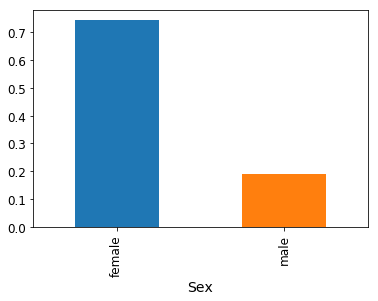

In [169]:
## 성별 only

Class_Sex = Data.groupby('Sex').mean()
Class_Sex
Class_Sex['Survived'].plot.bar()

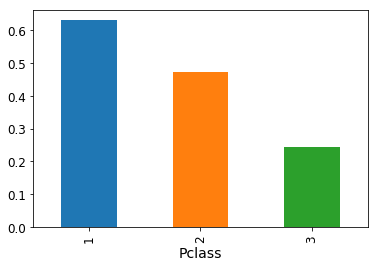

In [170]:
tmp = Data.groupby('Pclass').mean()
tmp["Survived"].plot.bar()

#Data.groupby('Pclass').mean()["Survived"].plot.bar()
# See the Correlation Matrix "pclass" vs "fare"
# Why Correlation between "pclass" and "fare" has (large) negative value?

In [171]:
Class_sex_pclass= Data.groupby(['Pclass','Sex']).mean()
Class_sex_pclass

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

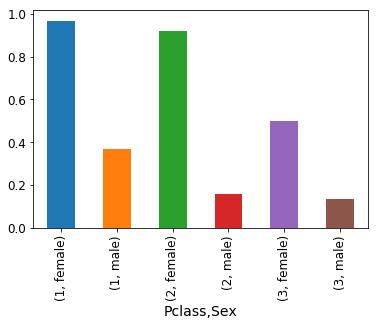

In [172]:
Class_sex_pclass['Survived'].plot.bar()

In [173]:

Group_by_age = pd.cut(Data["Age"], np.arange(0,90,10))
Group_by_age

0      (20, 30]
1      (30, 40]
2      (20, 30]
3      (30, 40]
4      (30, 40]
5           NaN
6      (50, 60]
7       (0, 10]
8      (20, 30]
9      (10, 20]
10      (0, 10]
11     (50, 60]
12     (10, 20]
13     (30, 40]
14     (10, 20]
15     (50, 60]
16      (0, 10]
17          NaN
18     (30, 40]
19          NaN
20     (30, 40]
21     (30, 40]
22     (10, 20]
23     (20, 30]
24      (0, 10]
25     (30, 40]
26          NaN
27     (10, 20]
28          NaN
29          NaN
         ...   
861    (20, 30]
862    (40, 50]
863         NaN
864    (20, 30]
865    (40, 50]
866    (20, 30]
867    (30, 40]
868         NaN
869     (0, 10]
870    (20, 30]
871    (40, 50]
872    (30, 40]
873    (40, 50]
874    (20, 30]
875    (10, 20]
876    (10, 20]
877    (10, 20]
878         NaN
879    (50, 60]
880    (20, 30]
881    (30, 40]
882    (20, 30]
883    (20, 30]
884    (20, 30]
885    (30, 40]
886    (20, 30]
887    (10, 20]
888         NaN
889    (20, 30]
890    (30, 40]
Name: Age, Length: 891, 

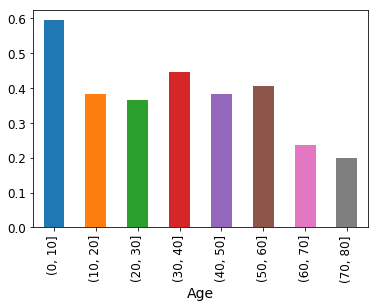

In [174]:
Group_by_age = pd.cut(Data["Age"], np.arange(0,90,10))
Class_age = Data.groupby(Group_by_age).mean()
Class_age
Class_age['Survived'].plot.bar()

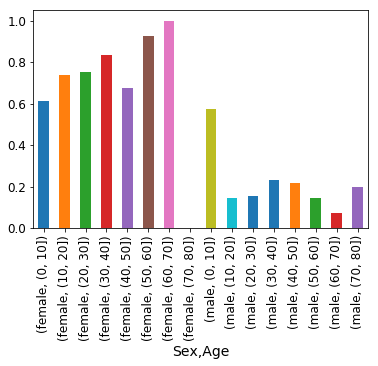

In [175]:
Class_Age_Pclass = Data.groupby(["Sex",Group_by_age]).mean()
Class_Age_Pclass['Survived'].plot.bar()

In [176]:
Data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [177]:
## Cabin Preprocessing -> Cabin_bool = Null = 0, Other = 1 

Data.loc[Data["Cabin"].str.contains('.',regex=True,na=False),"Cabin_Bin"] = 1
Data["Cabin_Bin"].fillna(0, inplace=True)

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [178]:
Data = Data.drop(["Cabin"],axis=1)
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0.0


In [179]:
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0.0


In [180]:

Data = Data.dropna()
Data.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
Cabin_Bin      712
dtype: int64

In [181]:
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,1.0


In [182]:
#(Data["Parch"]>0) & (Data["Age"]<10)
#Data.loc[(Data["Parch"]>0) & (Data["Age"]<10),"Child_with_Parent"] = 1
Data.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
Cabin_Bin      712
dtype: int64

In [183]:
Data["Age"].fillna(Data["Age"].mean(), inplace=True)
Data.dropna()
Data.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
Cabin_Bin      712
dtype: int64

In [184]:
## Parch > 0 and Age < 10

Data.loc[(Data["Parch"]>0) & (Data["Age"]<10),"Child_with_Parent"] = 1
Data["Child_with_Parent"].fillna(0, inplace=True)
#Data.head()

Data["Survived"].loc[Data["Child_with_Parent"] == 1].sum() / len(Data["Survived"].loc[Data["Child_with_Parent"] == 1])

0.6065573770491803

In [185]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
PassengerId          712 non-null int64
Survived             712 non-null int64
Pclass               712 non-null int64
Name                 712 non-null object
Sex                  712 non-null object
Age                  712 non-null float64
SibSp                712 non-null int64
Parch                712 non-null int64
Ticket               712 non-null object
Fare                 712 non-null float64
Embarked             712 non-null object
Cabin_Bin            712 non-null float64
Child_with_Parent    712 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 77.9+ KB


In [186]:
from sklearn import preprocessing

processed_df = Data.copy()
le = preprocessing.LabelEncoder()
processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.Embarked = le.fit_transform(processed_df.Embarked)
processed_df.Cabin_Bin = le.fit_transform(processed_df.Cabin_Bin)
processed_df.Child_with_Parent = le.fit_transform(processed_df.Child_with_Parent)

processed_df = processed_df.drop(['Name','Ticket','PassengerId'],axis=1)

In [187]:
processed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,0,3,1,22.0,1,0,7.2500,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,0
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,0


In [189]:
Corr_mat = processed_df.corr()
#Corr_mat
print(Corr_mat["Survived"].sort_values(ascending=False))


Survived             1.000000
Cabin_Bin            0.320733
Fare                 0.266100
Child_with_Parent    0.126027
Parch                0.095265
SibSp               -0.015523
Age                 -0.082446
Embarked            -0.181979
Pclass              -0.356462
Sex                 -0.536762
Name: Survived, dtype: float64


In [190]:
from sklearn import cross_validation

#X_drop_cabin = processed_df.drop(['Survived','Cabin_Bin'],axis=1).values
X = processed_df.drop(['Survived'],axis=1).values
y = processed_df['Survived'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

# or Use the gridsearch


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


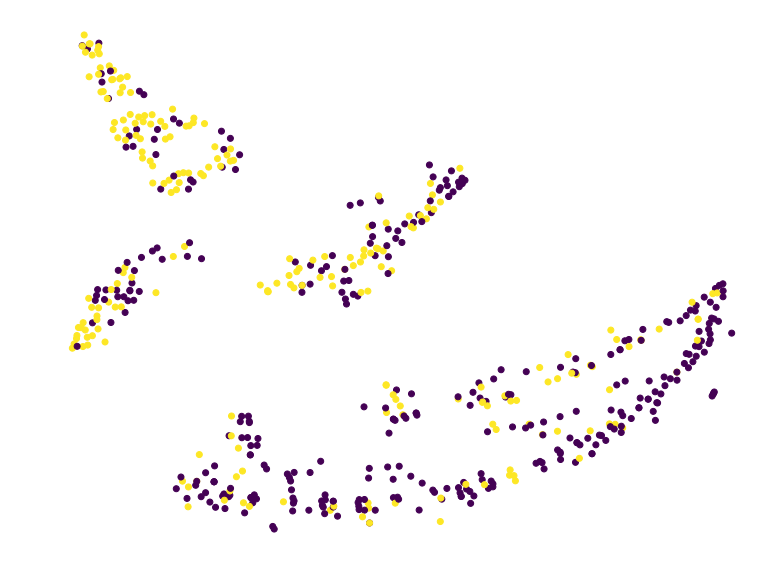

In [23]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_tsne = Pipeline([
    ("pca", PCA(n_components=4, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

X_reduced = pca_tsne.fit_transform(X_train)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_train)

plt.axis("off")
plt.show()

In [24]:
#print ("test ratio",sum(y_test)/len(y_test))
#print ("train ratio",sum(y_train)/len(y_train))
print ("test ratio", y_test.mean())
print ("test ratio", y_train.mean())

test ratio 0.4405594405594406
test ratio 0.3954305799648506


## Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ["l1","l2"], 'C':[0.5,1.0,2.0,999.]} 
    # Inverse of regularization Strength -> 1/C
    ]

logit_reg = LogisticRegression()
lr_grid_search = GridSearchCV(logit_reg, param_grid, cv=5,
                          scoring="accuracy")

lr_grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.5, 1.0, 2.0, 999.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [194]:
pd.DataFrame(lr_grid_search.cv_results_)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004451,0.000313,0.790730,0.805834,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",3,0.797203,0.808436,...,0.762238,0.810193,0.760563,0.808772,0.808511,0.796848,0.001319,0.000010,0.025571,0.004816
1,0.002007,0.000282,0.780899,0.802321,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",8,0.783217,0.799649,...,0.755245,0.808436,0.746479,0.803509,0.808511,0.796848,0.000351,0.000022,0.026548,0.003914
2,0.003831,0.000336,0.793539,0.812855,1,l1,"{'C': 1.0, 'penalty': 'l1'}",1,0.797203,0.813708,...,0.776224,0.820738,0.781690,0.812281,0.801418,0.807356,0.000183,0.000013,0.012875,0.004484
3,0.002036,0.000341,0.790730,0.807590,1,l2,"{'C': 1.0, 'penalty': 'l2'}",3,0.804196,0.810193,...,0.755245,0.808436,0.767606,0.812281,0.808511,0.796848,0.000128,0.000044,0.024697,0.005508
4,0.005377,0.000415,0.793539,0.813204,2,l1,"{'C': 2.0, 'penalty': 'l1'}",1,0.804196,0.813708,...,0.776224,0.818981,0.781690,0.815789,0.808511,0.809107,0.001162,0.000059,0.012574,0.003996
5,0.003116,0.000554,0.790730,0.810396,2,l2,"{'C': 2.0, 'penalty': 'l2'}",3,0.804196,0.808436,...,0.769231,0.817223,0.781690,0.812281,0.801418,0.805604,0.000279,0.000096,0.013289,0.004020
6,0.005733,0.000451,0.789326,0.812854,999,l1,"{'C': 999.0, 'penalty': 'l1'}",7,0.790210,0.817223,...,0.776224,0.818981,0.781690,0.815789,0.801418,0.807356,0.000976,0.000116,0.009364,0.005629
7,0.002429,0.000396,0.790730,0.812854,999,l2,"{'C': 999.0, 'penalty': 'l2'}",3,0.790210,0.817223,...,0.776224,0.818981,0.788732,0.815789,0.801418,0.807356,0.000412,0.000130,0.008611,0.005629


In [28]:
cvres = lr_grid_search.cv_results_
#cvres

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (lr_grid_search.best_params_)
print (lr_grid_search.best_score_)

0.7907303370786517 {'C': 0.5, 'penalty': 'l1'}
0.7808988764044944 {'C': 0.5, 'penalty': 'l2'}
0.7935393258426966 {'C': 1.0, 'penalty': 'l1'}
0.7907303370786517 {'C': 1.0, 'penalty': 'l2'}
0.7935393258426966 {'C': 2.0, 'penalty': 'l1'}
0.7907303370786517 {'C': 2.0, 'penalty': 'l2'}
0.7893258426966292 {'C': 999.0, 'penalty': 'l1'}
0.7907303370786517 {'C': 999.0, 'penalty': 'l2'}
{'C': 1.0, 'penalty': 'l1'}
0.7935393258426966


## Support Vector Machine

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC())
])

param_grid = [
        {'svm_clf__kernel': ['linear'], 'svm_clf__C': [10., 100., 1000.,10000.]},
        {'svm_clf__kernel': ['rbf'], 'svm_clf__C': [1.0,10.,100.,1000.0],
         'svm_clf__gamma': [0.01,0.1,1.0,]},
    ]

svm_grid_search = GridSearchCV(svm_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

svm_grid_search.fit(X,y)

cvres = svm_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (svm_grid_search.best_params_)
print (svm_grid_search.best_score_)

0.7949438202247191 {'svm_clf__C': 10.0, 'svm_clf__kernel': 'linear'}
0.7949438202247191 {'svm_clf__C': 100.0, 'svm_clf__kernel': 'linear'}
0.7949438202247191 {'svm_clf__C': 1000.0, 'svm_clf__kernel': 'linear'}
0.7949438202247191 {'svm_clf__C': 10000.0, 'svm_clf__kernel': 'linear'}
0.7879213483146067 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.8286516853932584 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.7612359550561798 {'svm_clf__C': 1.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.8188202247191011 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.7949438202247191 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.7556179775280899 {'svm_clf__C': 10.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.8230337078651685 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.7612359550561798 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.74

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dt_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("tf_clf", clf_dt),
])

param_grid = [
        {'tf_clf__criterion': ['gini'], 'tf_clf__max_depth' : [2,3,4,5]},
        {'tf_clf__criterion': ['entropy'], 'tf_clf__max_depth' : [2,3,4,5]},
    ]

dt_grid_search = GridSearchCV(dt_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

dt_grid_search.fit(X,y)

cvres = dt_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (dt_grid_search.best_params_)
print (dt_grid_search.best_score_)

0.7907303370786517 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 2}
0.7991573033707865 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 3}
0.8117977528089888 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.7921348314606742 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 5}
0.7907303370786517 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 2}
0.797752808988764 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 3}
0.7907303370786517 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 4}
0.7879213483146067 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 5}
{'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.8117977528089888


In [32]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("rf_clf", clf_rf),
])

param_grid = [
        {'rf_clf__n_estimators': [10,50,100,500], 
         'rf_clf__criterion': ["gini","entropy"], 
         'rf_clf__min_samples_split': [2,3,4,5]}
    ]

rf_grid_search = GridSearchCV(rf_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

rf_grid_search.fit(X,y)

cvres = rf_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (rf_grid_search.best_params_)
print (rf_grid_search.best_score_)

0.7935393258426966 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 10}
0.7935393258426966 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 50}
0.773876404494382 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 100}
0.7865168539325843 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 500}
0.7808988764044944 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 10}
0.7865168539325843 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 50}
0.7935393258426966 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 100}
0.7893258426966292 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 500}
0.7949438202247191 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 4, 'rf_clf__n_estimators': 10}
0.81039325842696

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier()
clf_gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

gb_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("gb_clf", clf_gb),
])

param_grid = [
        {'gb_clf__n_estimators': [10,50,100,500]},
    ]

gb_grid_search = GridSearchCV(gb_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

gb_grid_search.fit(X,y)

cvres = gb_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (gb_grid_search.best_params_)
print (gb_grid_search.best_score_)

0.800561797752809 {'gb_clf__n_estimators': 10}
0.8061797752808989 {'gb_clf__n_estimators': 50}
0.8216292134831461 {'gb_clf__n_estimators': 100}
0.8117977528089888 {'gb_clf__n_estimators': 500}
{'gb_clf__n_estimators': 100}
0.8216292134831461


## XGBoosting

In [36]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [37]:
xg_model = XGBClassifier(booster='gbtree',seed = 42)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

xg_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("xg_clf", xg_model),
])

param_grid = [
        {'xg_clf__base_score': [0.5,0.55,0.6,0.65,0.7], 
         'xg_clf__max_depth': [2,3,4], 
         'xg_clf__n_estimators' : [10,50,70,100]},
    ]

xg_grid_search = GridSearchCV(xg_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

xg_grid_search.fit(X,y)

cvres = xg_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (xg_grid_search.best_params_)
print (xg_grid_search.best_score_)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.797752808988764 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 10}
0.8103932584269663 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 50}
0.8033707865168539 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 70}
0.8089887640449438 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 100}
0.7907303370786517 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 10}
0.8075842696629213 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 50}
0.8075842696629213 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 70}
0.8132022471910112 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 100}
0.8061797752808989 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 10}
0.8075842696629213 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 50}
0.8103932

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

## Voting Classifier

In [39]:
lr_best_model = lr_grid_search.best_estimator_
svm_best_model= svm_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
xg_best_model = xg_grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier([('lr', lr_best_model),
                         ('svm', svm_best_model),
                         ('dt', dt_best_model),
                         ('rf', rf_best_model),
                         ('gb', gb_best_model),
                         ('xg', xg_best_model),
                        ])

eclf.fit(X,y)
eclf.score(X,y)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8792134831460674

## Install LightGBM on Python using pip3

```python
pip3 install lightgbm
pip3 install setuptools wheel numpy scipy scikit-learn -U
```